In [2]:
# Import library
import pandas as pd

In [1]:
# Defining the customer info dictionary
Customer_info = {
  'customer_id': [1, 2, 3, 4, 5],
  'age': [25, 35, 42, 28, 19],
  'gender': ['M', 'F', 'M', 'M', 'F'],
  'purchase_amount': [50.2, 100.5, 75.8, 30.1, 60.7],
  'membership_duration': [12, 24, 36, 6, 18],
  'class': ['A', 'B', 'C', 'B', 'A']
}

In [3]:
# COnverting dictionary to dataframe
customer_info_df = pd.DataFrame(Customer_info)

In [6]:
# Checking integrity of dataframe
customer_info_df.head()

,customer_id,age,gender,purchase_amount,membership_duration,class
0,1,25,M,50.2,12,A
1,2,35,F,100.5,24,B
2,3,42,M,75.8,36,C
3,4,28,M,30.1,6,B
4,5,19,F,60.7,18,A


In [10]:
# Importing library
import numpy as np
# Extracting target variable and features
features = customer_info_df.loc[:, ~customer_info_df.columns.isin(["class"])]
target = customer_info_df.loc[:, customer_info_df.columns.isin(["class"])]
features_arr = np.array(features)
target_arr = np.array(target)

In [11]:
# Checking features array integrity
features_arr

array([[1, 25, 'M', 50.2, 12],
       [2, 35, 'F', 100.5, 24],
       [3, 42, 'M', 75.8, 36],
       [4, 28, 'M', 30.1, 6],
       [5, 19, 'F', 60.7, 18]], dtype=object)

In [12]:
# Checking target array integrity
target_arr

array([['A'],
       ['B'],
       ['C'],
       ['B'],
       ['A']], dtype=object)

In [13]:
# Checking for missing values
print(customer_info_df.isna().sum())

customer_id            0
age                    0
gender                 0
purchase_amount        0
membership_duration    0
class                  0
dtype: int64


In [14]:
customer_info_df.dtypes

customer_id              int64
age                      int64
gender                  object
purchase_amount        float64
membership_duration      int64
class                   object
dtype: object

In [15]:
# Dropping rows with missing values
df_dropped = customer_info_df.dropna()

In [16]:
# Imputing missing values with mean for numerical columns
# mode for categorical columns
df_imputted = customer_info_df.copy()
for col in customer_info_df.columns:
  if customer_info_df[col].dtype == "object":
    mode = customer_info_df[col].mode()[0]
    df_imputted[col].fillna(mode, inplace = True)
  elif pd.api.types.is_numeric_dtype(customer_info_df[col]):
    mean = customer_info_df[col].mean()
    df_imputted[col].fillna(mean, inplace= True)

In [17]:
print(df_dropped.isna().sum())
print("------------------------")
print(df_imputted.isna().sum())

customer_id            0
age                    0
gender                 0
purchase_amount        0
membership_duration    0
class                  0
dtype: int64
------------------------
customer_id            0
age                    0
gender                 0
purchase_amount        0
membership_duration    0
class                  0
dtype: int64


In [27]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as mp
import seaborn as sb

In [28]:
# imorting dataset as a dataframe
car_accidents_df = pd.read_csv("/content/car_accidents.csv")

In [21]:
car_accidents_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


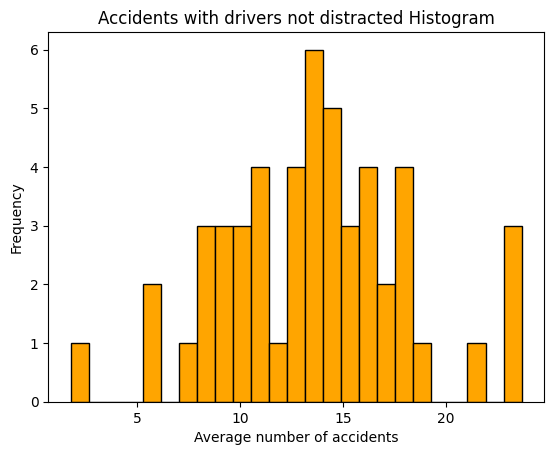

In [24]:
# Creating distribution plot for accidents
# where driver is not distracted

# Set bins to 25
num_bins = 25
# Creating histogram
plt.hist(car_accidents_df["not_distracted"], bins = num_bins, color = "orange",
         edgecolor = "black")
plt.xlabel("Average number of accidents")
plt.ylabel("Frequency")
plt.title("Accidents with drivers not distracted Histogram")
plt.show()

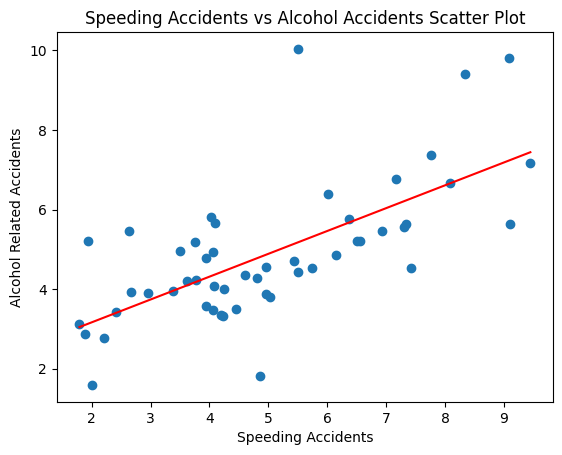

In [26]:
# Scatter chart of speeding vs alcohol accidents with regression line

# Create scatter plot
plt.scatter(car_accidents_df["speeding"], car_accidents_df["alcohol"],
            label = "data points")
# Calculate regression line coefficient
coeff = np.polyfit(car_accidents_df["speeding"], car_accidents_df["alcohol"], 1)
regression_line = np.poly1d(coeff)
# Calculate y-values for the regression line
range_x = np.linspace(min(car_accidents_df["speeding"]),
                      max(car_accidents_df["speeding"]),
                      100)
regression_y = regression_line(range_x)
# Plot regression line
plt.plot(range_x, regression_y, color='red', label='Regression Line')

# Adding labels and title
plt.xlabel('Speeding Accidents')
plt.ylabel('Alcohol Related Accidents')
plt.title('Speeding Accidents vs Alcohol Accidents Scatter Plot')
# Display plot
plt.show()

<Figure size 640x480 with 0 Axes>

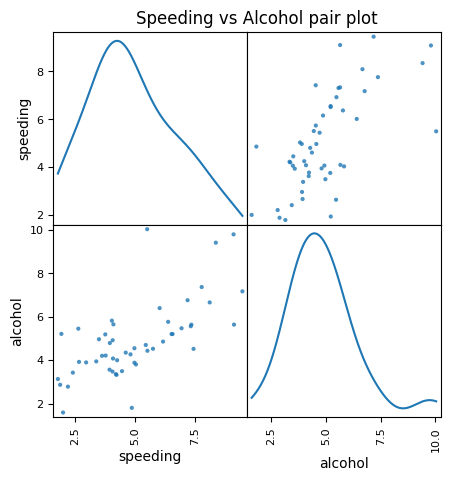

In [42]:
# Extracting relevant features
pair_plot_data = car_accidents_df[["speeding", "alcohol"]]
# Speeding vs Alcohol pair plot
plt.figure()
pd.plotting.scatter_matrix(pair_plot_data, alpha=0.8, figsize=(5,5), diagonal = "kde")
plt.title("Speeding vs Alcohol pair plot", y = 2, x = 0.05)
plt.show()

In [47]:
# Importing library
from scipy.stats import pearsonr
# Getting Pearson's correlation coefficient for speeding and alcohol columns
cor_coeff = pearsonr(car_accidents_df['speeding'],
                            car_accidents_df['alcohol'])[0]
# Displaying results
print("Pearson's correlation coefficient:", cor_coeff)

Pearson's correlation coefficient: 0.6697185644227317


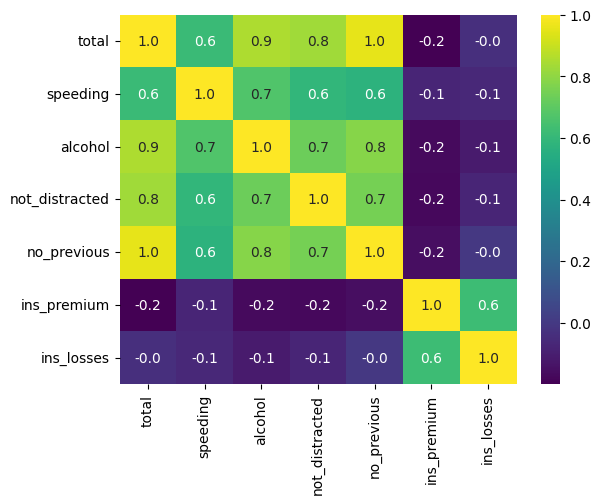

In [52]:
# Extracting relevant columns
heatmap_data = car_accidents_df.loc[:, ~car_accidents_df.columns.isin(["abbrev"])]
# Getting correlation matrix
cor_matrix = heatmap_data.corr()
# Plotting a heatmap
sb.heatmap(cor_matrix, cmap = "viridis", annot=True, fmt = ".1f")
# Display plot
plt.show()

In [53]:
# Import Library
import pandas as pd
# Import Telco-Customer-Churn dataset as a dataframe
telco_df = pd.read_csv("/content/Telco-Customer-Churn.csv")

In [54]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
